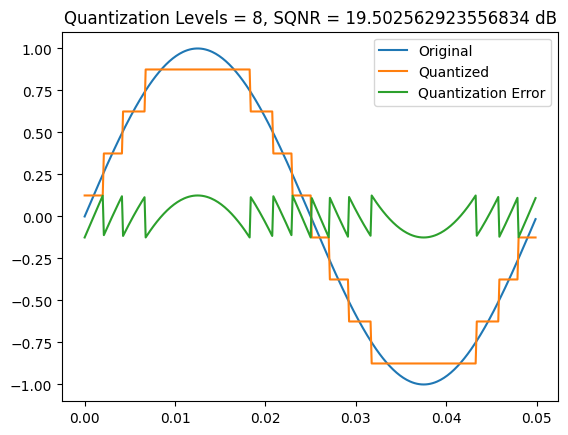

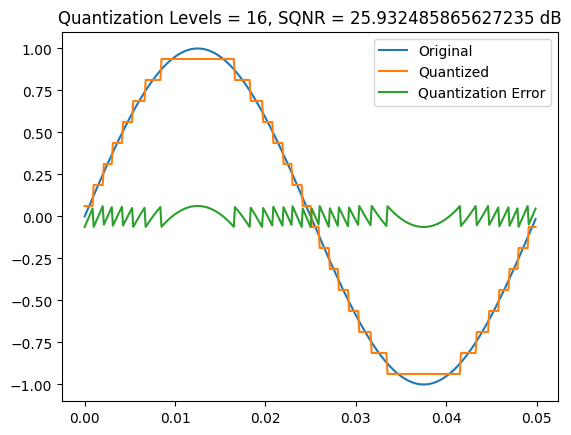

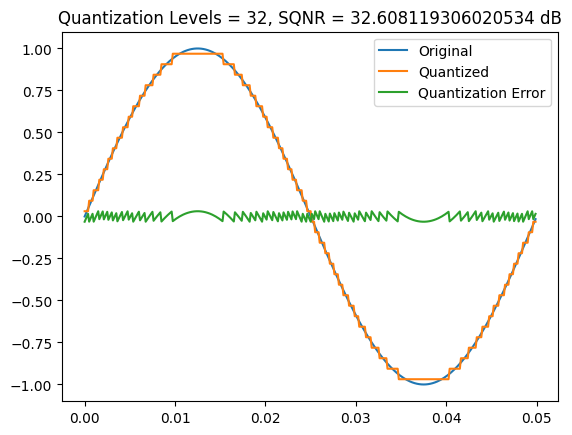

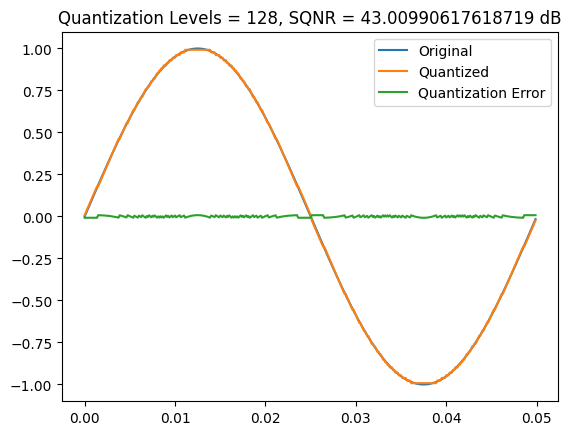

In [1]:
import numpy as np
import matplotlib.pyplot as plt


class Signal:
    def __init__(self, frequency: int, sampling_freq: int, *quantization_levels):
        self.frequency = frequency
        self.time = 1 / self.frequency

        self.sampling_freq = sampling_freq
        self.sampling_time = 1 / self.sampling_freq

        self.t = np.arange(0, self.time, self.sampling_time)
        self.signal = np.sin(2 * np.pi * self.frequency * self.t)

        self.quantization_levels = quantization_levels

    def quantization(self):
        sig_max = max(self.signal)
        sig_min = min(self.signal)

        for ql in self.quantization_levels:
            delta = (sig_max - sig_min) / ql  # quantization intervals
            q_level = np.arange(sig_min + delta / 2, sig_max, delta)  # amplitudes of each q levels
            sigp = self.signal - sig_min  # avoid negative amplitudes

            sigp = sigp / delta
            sigp = sigp + 1 / 2 + 0.0001

            qindex = np.round(sigp)
            qindex[qindex > ql] = ql
            qindex = qindex.astype(int)
            q_out = q_level[abs(qindex - 1)]

            sqnr = np.mean(20 * np.log10(np.abs(self.signal[1:]) / (np.abs(self.signal[1:] - q_out[1:]))))

            plt.plot(self.t, self.signal, self.t, q_out, self.t, (self.signal - q_out))
            plt.title(f'Quantization Levels = {ql}, SQNR = {sqnr} dB')
            plt.legend(["Original", "Quantized", "Quantization Error"])
            plt.show()


if __name__ == '__main__':
    fs = 8000
    fm = 20

    signal = Signal(fm, fs, 8, 16, 32, 128)
    signal.quantization()

